<a href="https://colab.research.google.com/github/asadiv/Pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

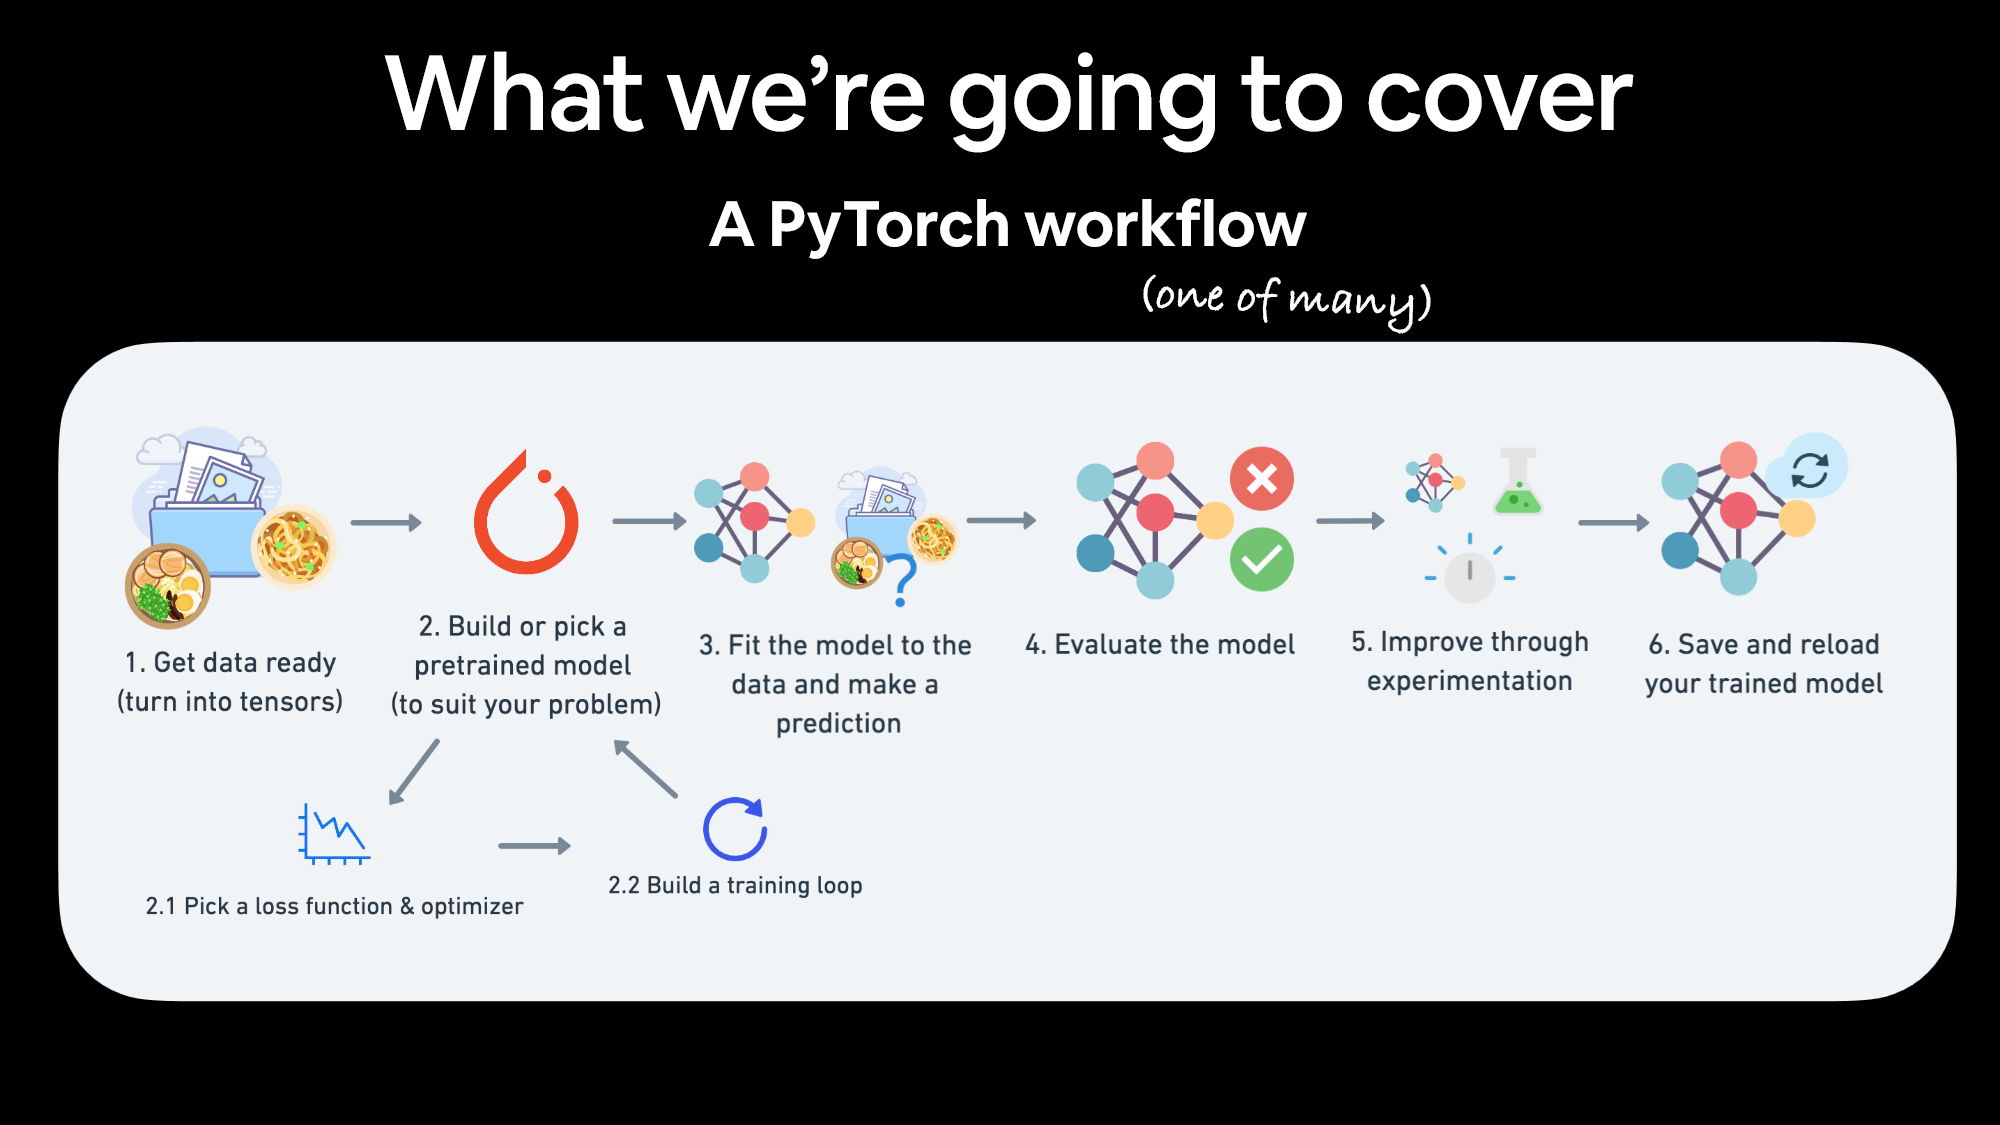

In [1]:
import torch
from torch import nn #contains building blocks for neural networks
import matplotlib.pyplot as plt


In [2]:
#create know parameters
weight = 0.7
bias =0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)

y = weight * X + bias

X[:10], y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [3]:
#creating training and testing data
train_split = int(0.8*len(X))

x_train,y_train = X[:train_split],y[:train_split]
x_test,y_test = X[train_split:],y[train_split:]

len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [4]:
def ploting(trainData = x_train,trainLabel = y_train,testData = x_test,testLabel = y_test,predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(trainData,trainLabel,c="b",s=4,label="training data")
    plt.scatter(testData,testLabel,c="g",s=4,label="testing data")
    if predictions is not None:
        plt.scatter(testData,predictions,c="r",s=4,label="predictions")
    plt.legend(prop={"size":14})


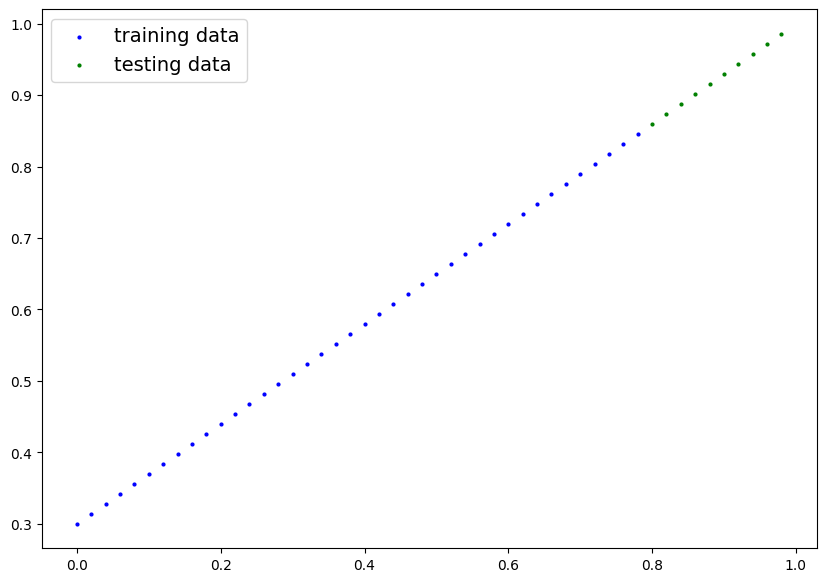

In [5]:
ploting()

In [6]:
import torch
from torch import nn

#creating a linearregression model
class LinearregModel(nn.Module):
  def __init__(self):
    super().__init__()
    #initially these weight and bias will be random, they will try to reach the ideal values(defined above for the dataset)
    # nn.parameters could be layers (nn.Linear(infeatures,outfeatures))
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    #forward method for defining computation inside model-> should be override for every subclass of nn.module
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights * x + self.bias


In [7]:
# whats inside the model
torch.manual_seed(42)
model0 = LinearregModel()

#check out the parameters
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# named parameters
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
# lets check predictive power of our model
# we could have just wrote preds = model0(x_test)
# we use inference mode cuz it auto disables req_grad and thus predictions run faster with little computation
with torch.inference_mode():
  preds = model0(x_test)
preds  # very different from y_test initially

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

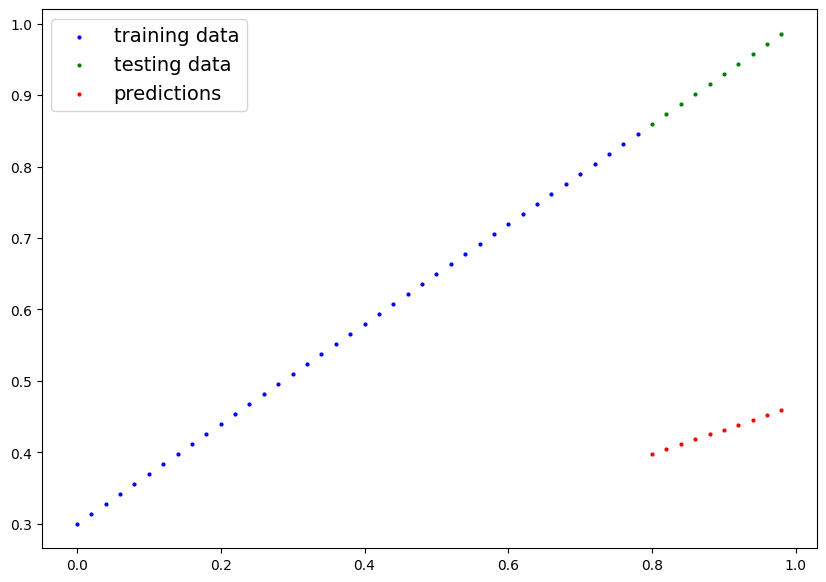

In [10]:
ploting(predictions=preds)

In [11]:
# setup a loss function
loss_fn = nn.L1Loss() # mean absolute error for regression problems (binary cross entropy for binary classification)

#setup optimizer
optimizer = torch.optim.SGD(params = model0.parameters(), lr = 0.01)

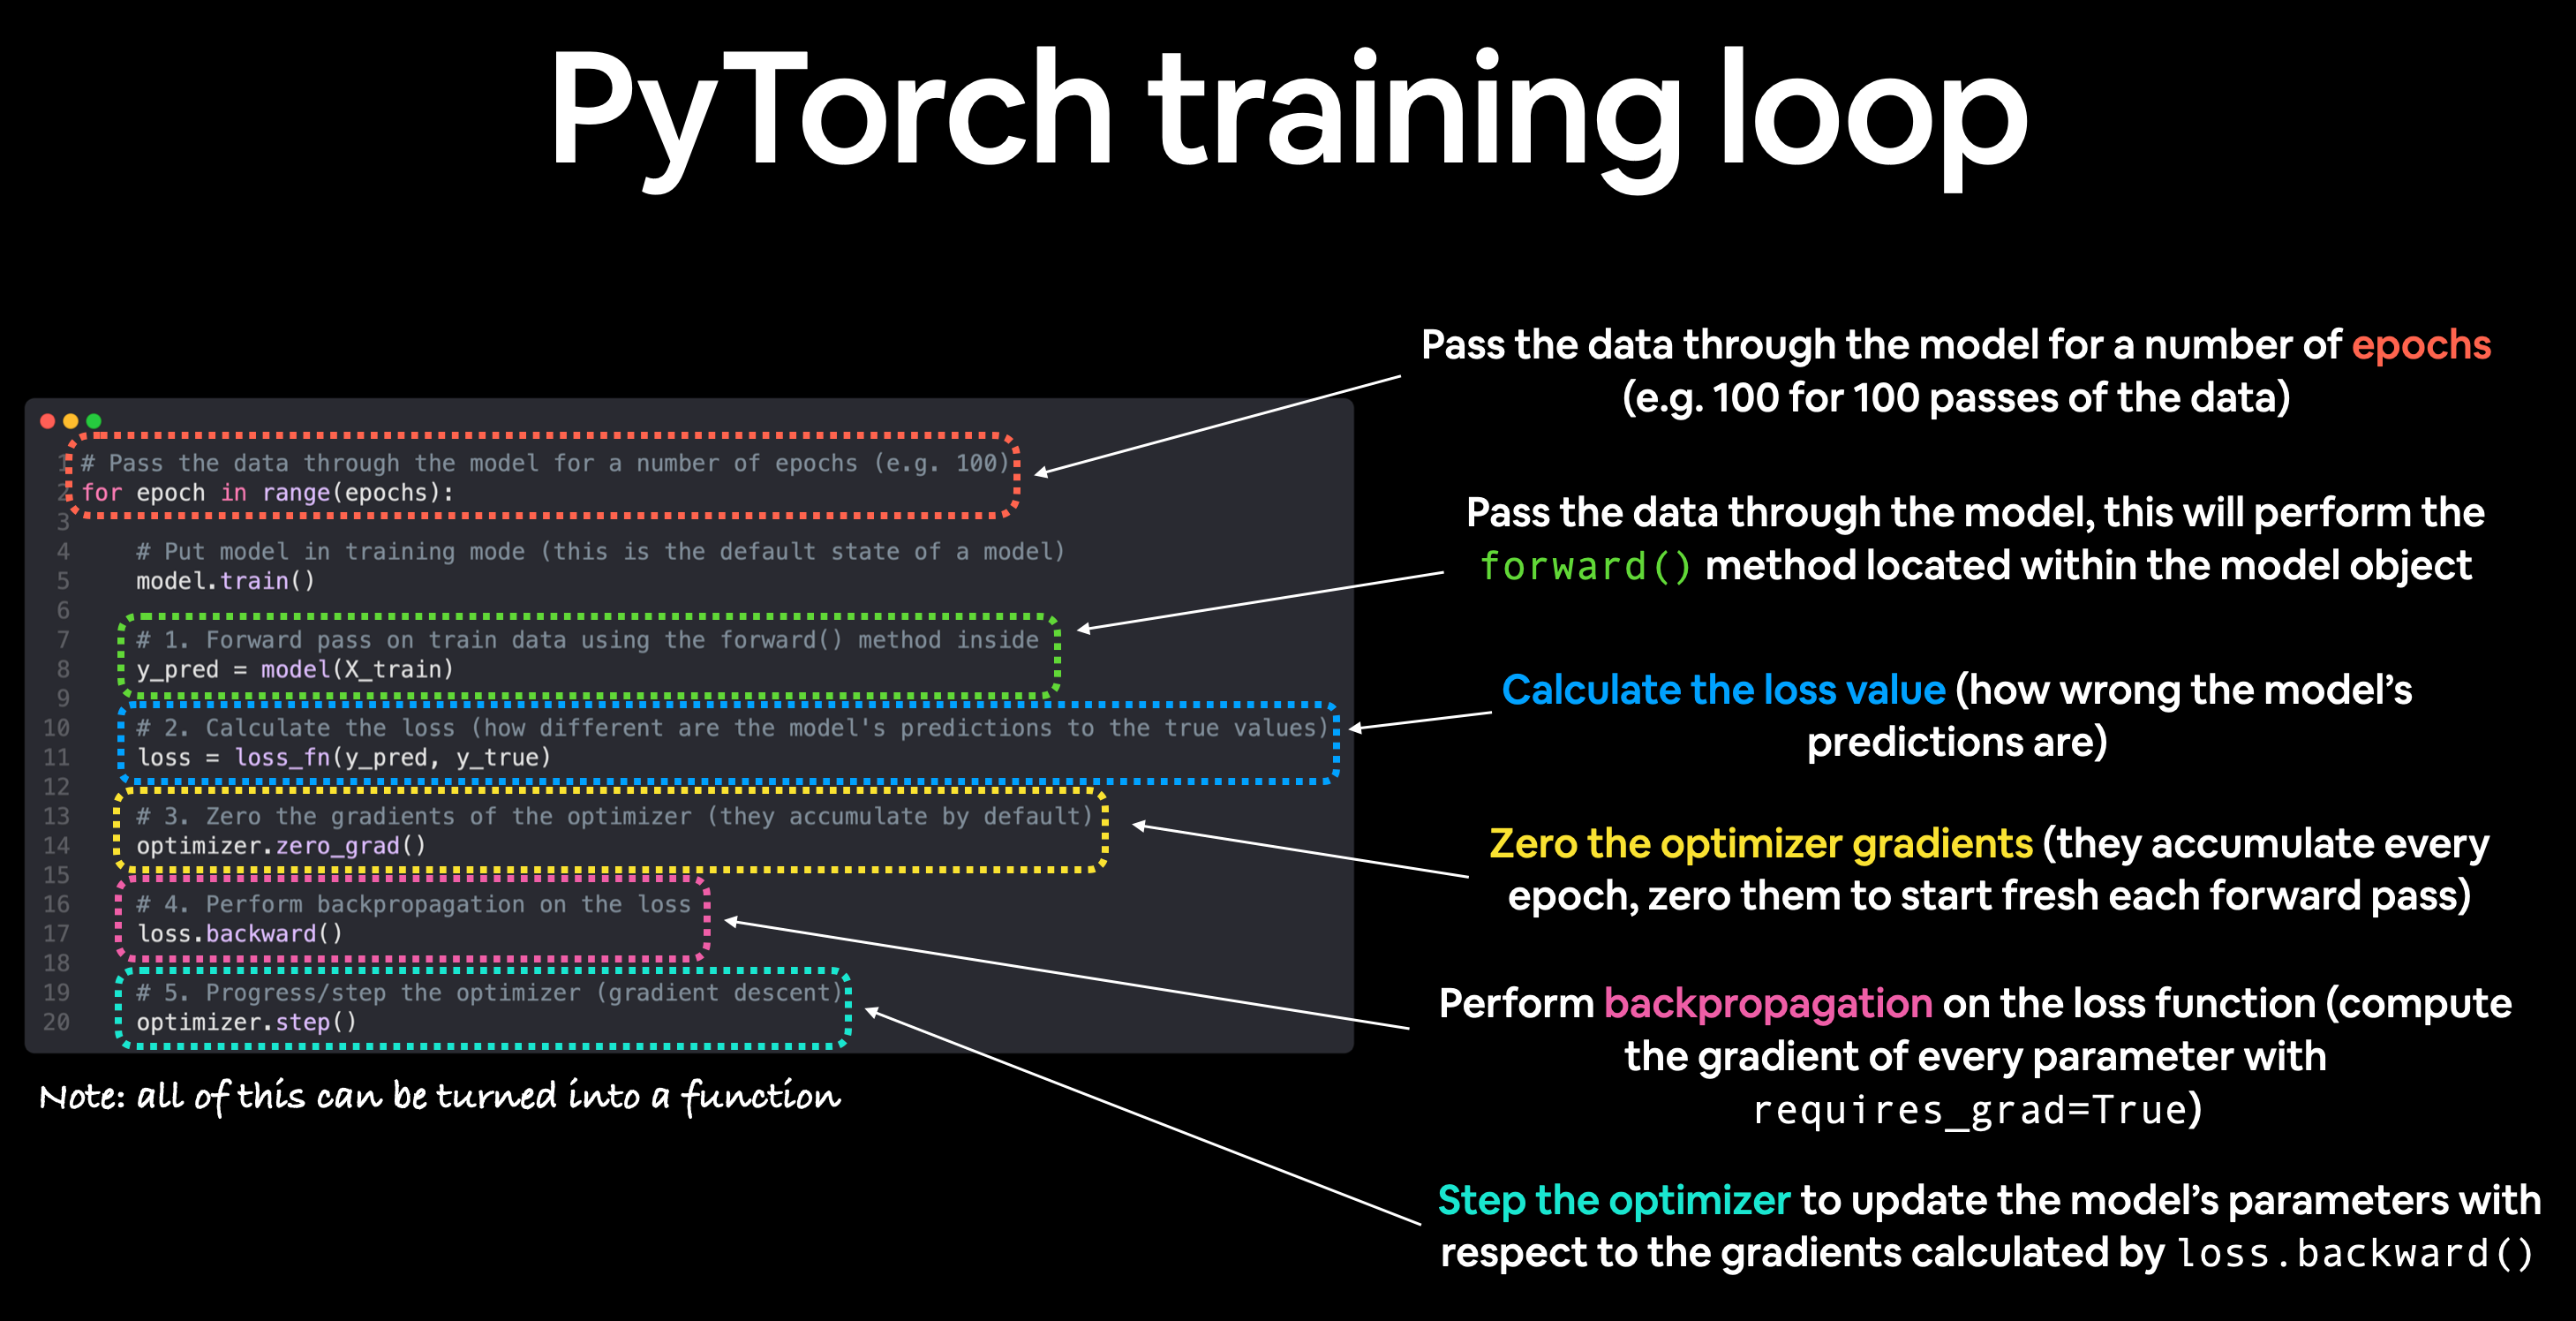

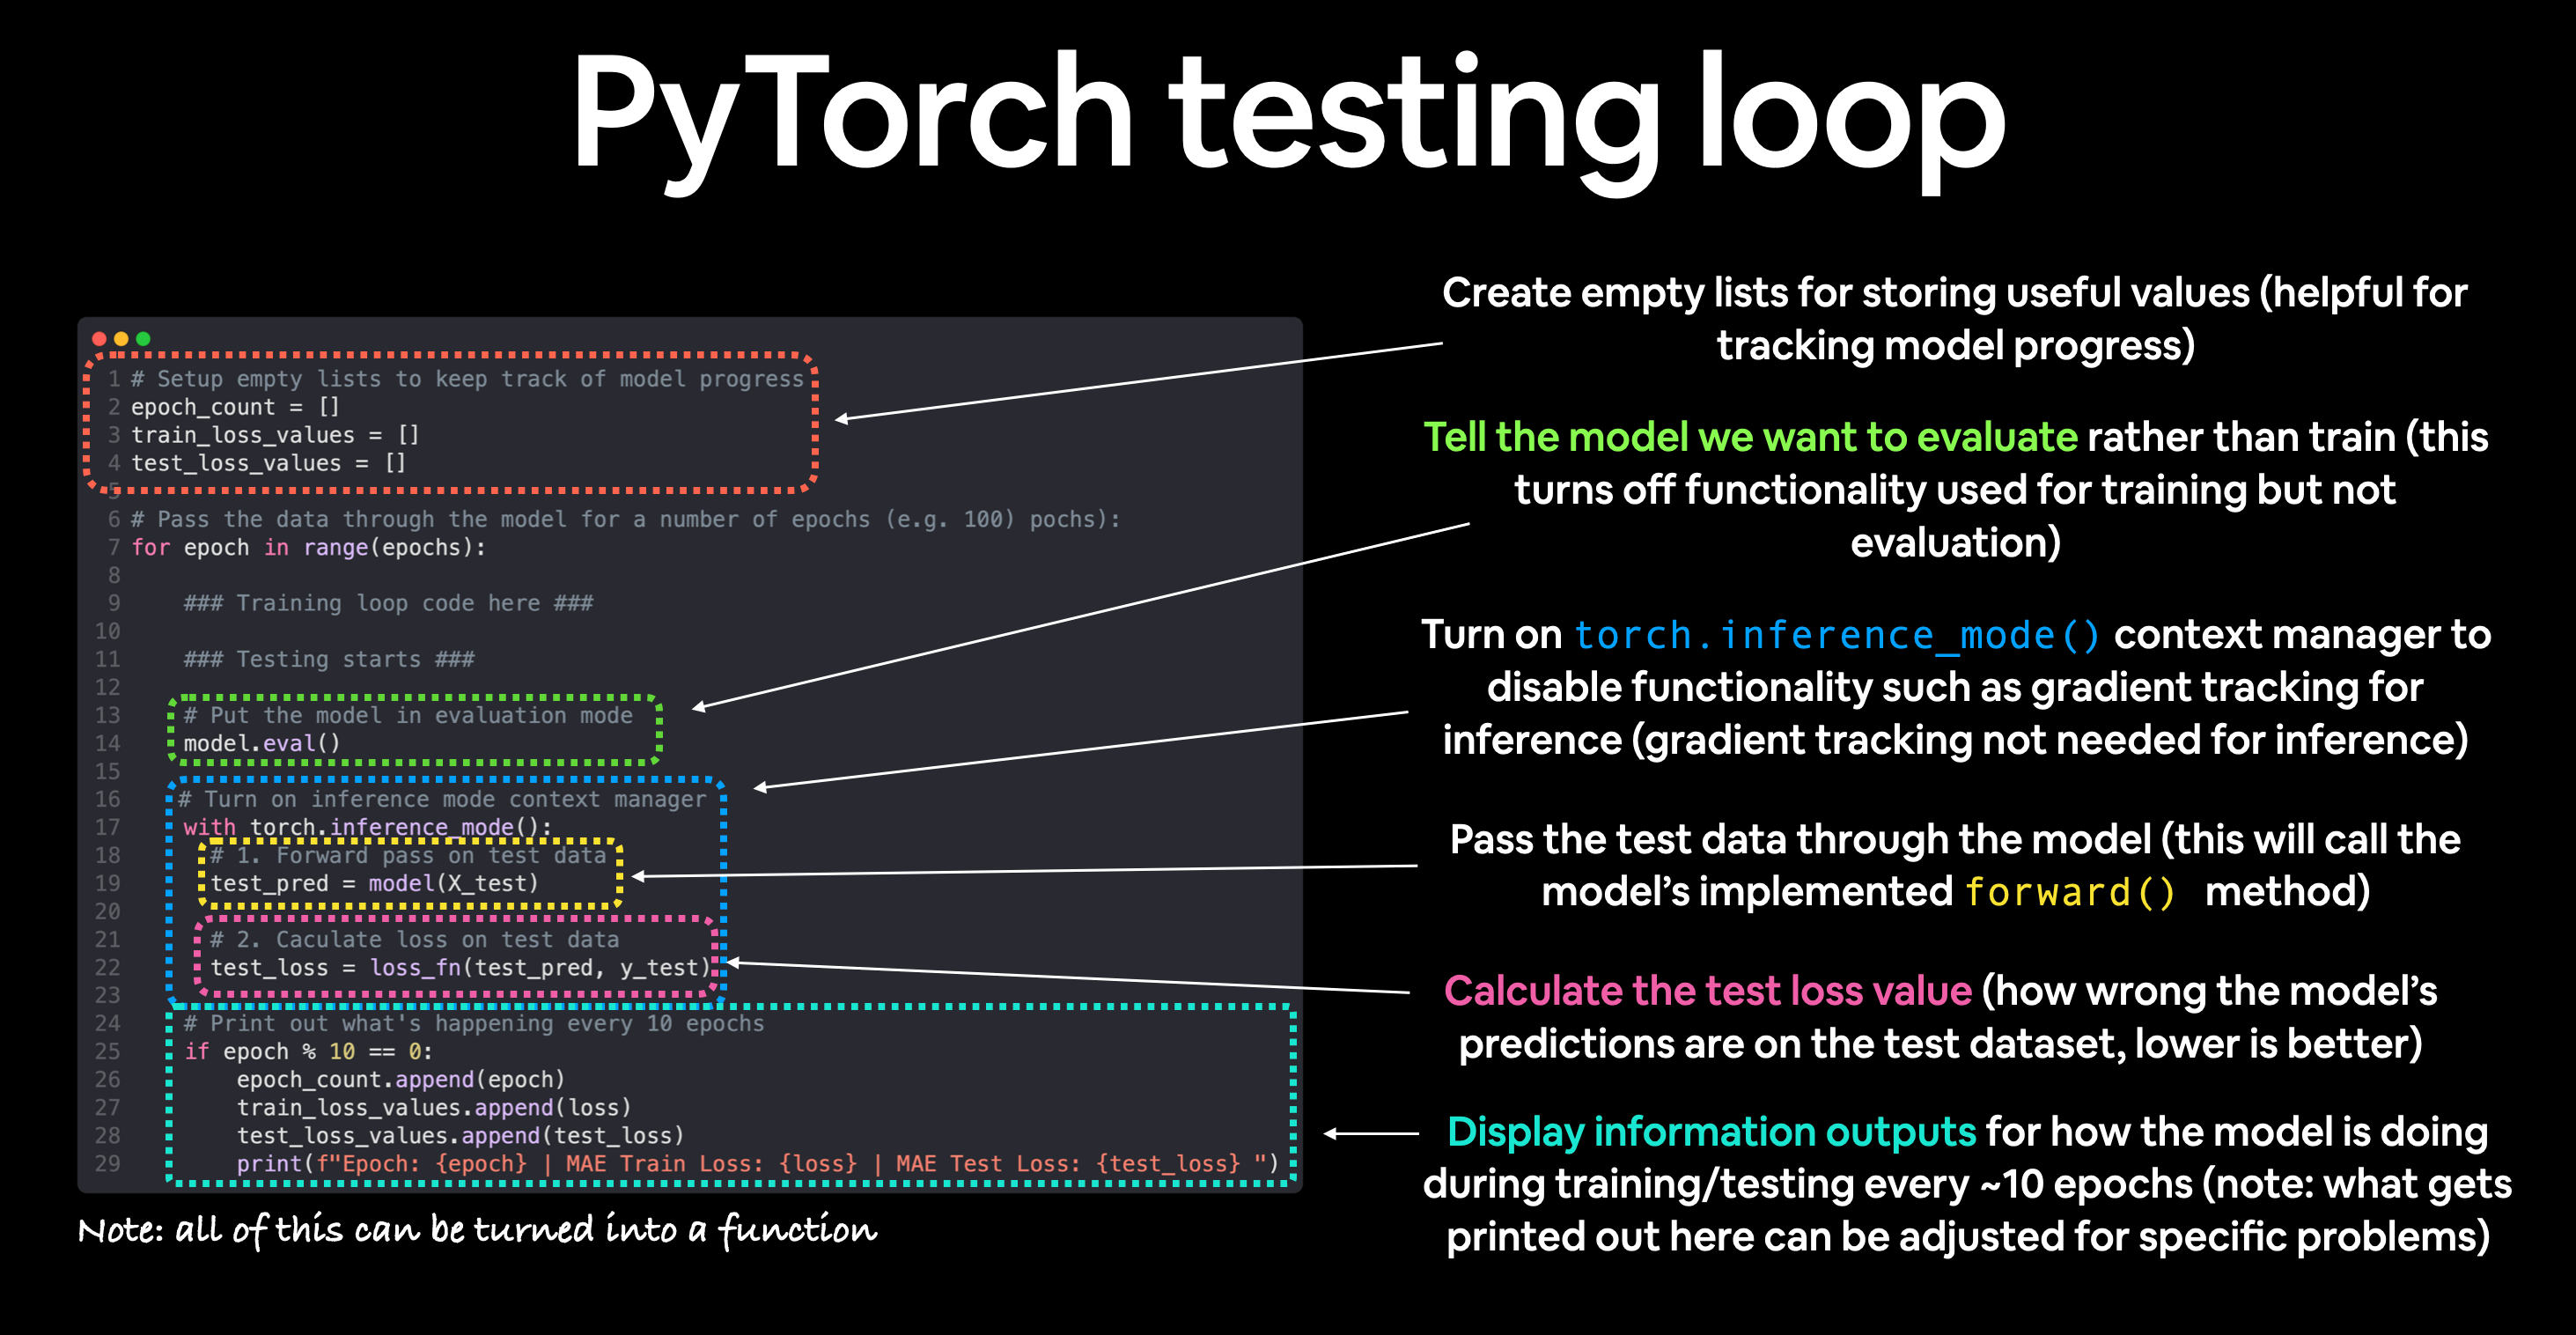

In [12]:
# now lets write training loop and test the model every 10 epochs
torch.manual_seed(42)
epochs = 200

#store imp data
epoch_count = []
train_loss_list = []
test_loss_list = []

for epoch in range(epochs):
    model0.train() # default mode - sets reqgrad to true
    y_preds = model0(x_train)# forward pass
    loss = loss_fn(y_preds,y_train)
    optimizer.zero_grad() # sets previous grads to zero otherwise accumulates
    loss.backward() # backpropagation - updates grads
    optimizer.step() # param = param - lr*grad - gradient descent
    #put in eval mode
    model0.eval() # gets ready for evaluation nad turns off features like dropout
    with torch.inference_mode(): # to disable autograd
      test_preds = model0(x_test)
      test_loss = loss_fn(test_preds,y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_list.append(loss.item())
      test_loss_list.append(test_loss.item())
      #we could also write the following but for single values when we dont need numpy arrs for ops its better to use item()
      # detach is used cuz if reqgrad is true, it wont convert to numpy. so detach removes connection from autograd
      #.cpu() is ised cuz if on gpu it wil give error cuz numpy dont work on gpu
      # train_loss_list.append(loss.detach().cpu().numpy())
      # test_loss_list.append(test_loss.detach().cpu().numpy())
      print(f"Epoch: {epoch}, train loss: {loss}, test loss: {test_loss}")

Epoch: 0, train loss: 0.31288138031959534, test loss: 0.48106518387794495
Epoch: 10, train loss: 0.1976713240146637, test loss: 0.3463551998138428
Epoch: 20, train loss: 0.08908725529909134, test loss: 0.21729660034179688
Epoch: 30, train loss: 0.053148526698350906, test loss: 0.14464017748832703
Epoch: 40, train loss: 0.04543796554207802, test loss: 0.11360953003168106
Epoch: 50, train loss: 0.04167863354086876, test loss: 0.09919948130846024
Epoch: 60, train loss: 0.03818932920694351, test loss: 0.08886633068323135
Epoch: 70, train loss: 0.03476089984178543, test loss: 0.0805937647819519
Epoch: 80, train loss: 0.03132382780313492, test loss: 0.07232122868299484
Epoch: 90, train loss: 0.02788739837706089, test loss: 0.06473556160926819
Epoch: 100, train loss: 0.024458957836031914, test loss: 0.05646304413676262
Epoch: 110, train loss: 0.021020207554101944, test loss: 0.04819049686193466
Epoch: 120, train loss: 0.01758546568453312, test loss: 0.04060482233762741
Epoch: 130, train loss:

In [13]:
print(f"actual weight: {weight}, actual bias: {bias}")
print("predicted weight and bias after training: ")
model0.state_dict()

actual weight: 0.7, actual bias: 0.3
predicted weight and bias after training: 


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

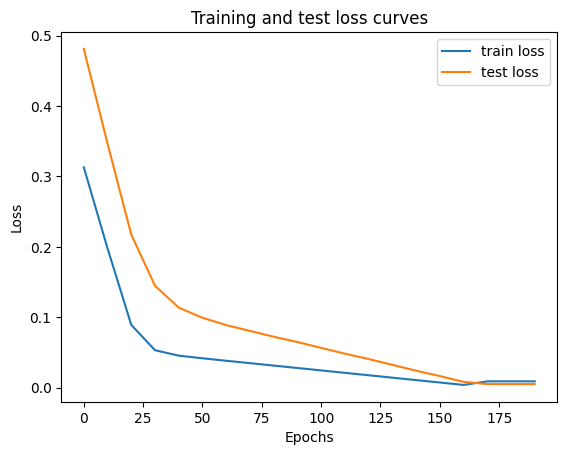

In [14]:
# plot the losses
plt.plot(epoch_count,train_loss_list,label="train loss")
plt.plot(epoch_count,test_loss_list,label="test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

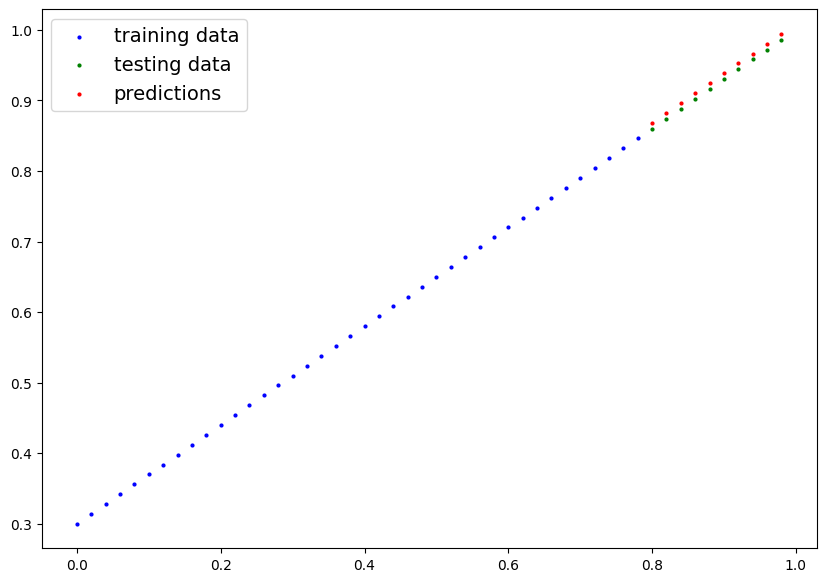

In [15]:
ploting(predictions = test_preds)

In [16]:
# saving model
from pathlib import Path
Model_path = Path("models")
Model_path.mkdir(parents=True,exist_ok=True)

model_name = Path("model0.pth")
save_path = Model_path / model_name

torch.save(obj=model0.state_dict(),f=save_path)

In [17]:
#load model
#create new
load_model0 = LinearregModel()
load_model0.load_state_dict(torch.load(f=save_path))
load_model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])